# Part 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"
df = pd.read_csv(url)
df.head()

,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
0,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,IE0,Ireland,Number,5149139
1,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1492-13a3-e055-000000000001,Carlow County Council,Number,61968
2,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-1433-13a3-e055-000000000001,Dublin City Council,Number,592713
3,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-149f-13a3-e055-000000000001,Dún Laoghaire Rathdown County Council,Number,233860
4,FY006AC01,Population,2022,2022,-,Both sexes,-,All ages,2ae19629-14a0-13a3-e055-000000000001,Fingal County Council,Number,330506


In [3]:
df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'CensusYear',
       'C02199V02655', 'Sex', 'C02076V03371', 'Single Year of Age',
       'C03789V04537', 'Administrative Counties', 'UNIT', 'VALUE'],
      dtype='object')

In [4]:
drop_columns = ['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'CensusYear',
                'C02199V02655', 'C02076V03371',
                'C03789V04537', 'UNIT']

In [5]:
df.drop(columns=drop_columns, inplace=True)
df.head()

,Sex,Single Year of Age,Administrative Counties,VALUE
0,Both sexes,All ages,Ireland,5149139
1,Both sexes,All ages,Carlow County Council,61968
2,Both sexes,All ages,Dublin City Council,592713
3,Both sexes,All ages,Dún Laoghaire Rathdown County Council,233860
4,Both sexes,All ages,Fingal County Council,330506


In [6]:
df = df[df['Administrative Counties'] == 'Ireland']
df.drop(columns=['Administrative Counties'], inplace=True)
df.head()

,Sex,Single Year of Age,VALUE
0,Both sexes,All ages,5149139
32,Both sexes,Under 1 year,57796
64,Both sexes,1 year,56420
96,Both sexes,2 years,59210
128,Both sexes,3 years,60484


In [7]:
df = df[df['Sex'] != 'Both sexes']
df = df[df['Single Year of Age'] != 'All ages']
df.head()

,Sex,Single Year of Age,VALUE
3296,Male,Under 1 year,29610
3328,Male,1 year,28875
3360,Male,2 years,30236
3392,Male,3 years,31001
3424,Male,4 years,31686


In [8]:
df['Single Year of Age'] = df['Single Year of Age'].replace('Under 1 year', '0', regex=True)
df['Single Year of Age'] = df['Single Year of Age'].str.replace('\\D', '', regex=True)
df['Single Year of Age'] = pd.to_numeric(df['Single Year of Age'])
df['VALUE'] = pd.to_numeric(df['VALUE'])
df['Single Year of Age'] = pd.to_numeric(df['Single Year of Age'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 3296 to 9760
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sex                 202 non-null    object
 1   Single Year of Age  202 non-null    int64 
 2   VALUE               202 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.3+ KB


In [9]:
df.head()

,Sex,Single Year of Age,VALUE
3296,Male,0,29610
3328,Male,1,28875
3360,Male,2,30236
3392,Male,3,31001
3424,Male,4,31686


In [10]:
df_male = df[df['Sex'] == 'Male'].drop(columns=['Sex']).set_index('Single Year of Age')
df_female = df[df['Sex'] == 'Female'].drop(columns=['Sex']).set_index('Single Year of Age')
df_male.head()

,VALUE
Single Year of Age,
0,29610
1,28875
2,30236
3,31001
4,31686


<Axes: title={'center': 'Population Differences, Male = Positive'}, xlabel='Single Year of Age'>

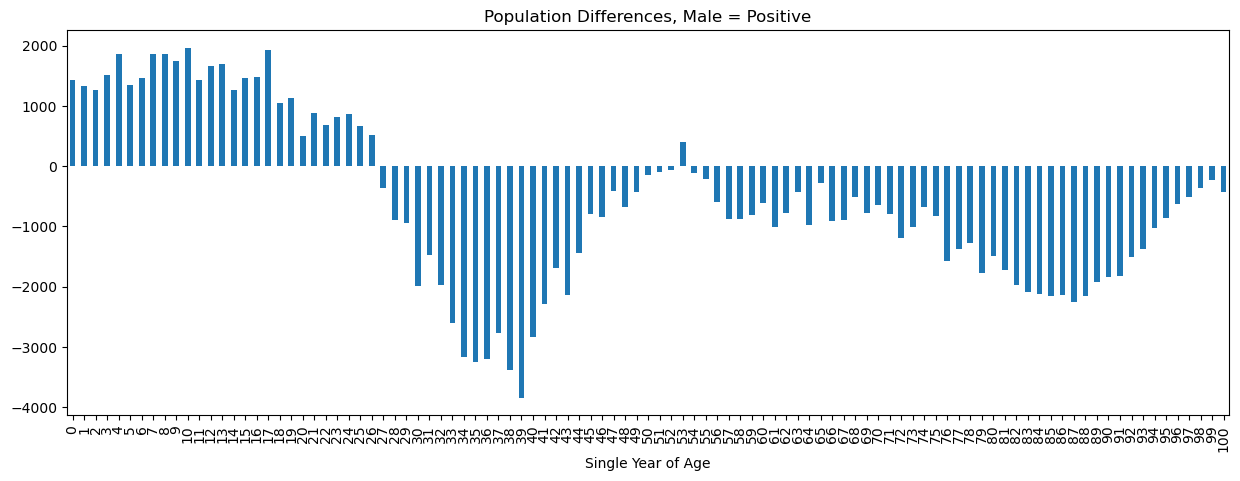

In [11]:
differences = df_male['VALUE'] - df_female['VALUE']
differences.plot(kind='bar', figsize=(15, 5), title='Population Differences, Male = Positive')

In [12]:
print(f'Difference in male and female population: \
{abs((df_female.sum() - df_male.sum())["VALUE"])}')

Difference in male and female population: 60041


In [13]:
male_mean = np.average(df_male.index, weights=df_male['VALUE'])
print(f'Average age of males in Ireland: {male_mean}')

Average age of males in Ireland: 37.7394477371039


In [14]:
female_mean = np.average(df_female.index, weights=df_female['VALUE'])
print(f'Average age of females in Ireland: {female_mean}')

Average age of females in Ireland: 38.9397958987787


# Part 2:

In [15]:
target_age = 35
age_max = target_age + 5
age_min = target_age - 6

In [16]:
df_male['Target'] = pd.cut(df_male.index, bins=[-1, age_min, age_max, 100],
                        labels=['Below', 'Target', 'Above'])
df_female['Target'] = pd.cut(df_female.index, bins=[-1, age_min, age_max, 100],
                        labels=['Below', 'Target', 'Above'])
df_male.iloc[25:46]

,VALUE,Target
Single Year of Age,,
25,29969,Below
26,29376,Below
27,29162,Below
28,28902,Below
29,29989,Below
30,30858,Target
31,32237,Target
32,32413,Target
33,31888,Target


In [17]:
total_target_male = df_male.groupby('Target', observed=False).sum()['VALUE']['Target']
total_target_female = df_female.groupby('Target', observed=False).sum()['VALUE']['Target']


In [18]:
print(f'Difference in population aged {target_age} ± 5 years: \
{abs(total_target_female - total_target_male)}')

Difference in population aged 35 ± 5 years: 30476


# Part 3:

In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [20]:
df = pd.read_csv(url)
df.drop(columns=drop_columns, inplace=True)
df = df[df['Sex'] != 'Both sexes']
df = df[df['Single Year of Age'] != 'All ages']
df['Single Year of Age'] = df['Single Year of Age'].replace('Under 1 year', '0', regex=True)
df['Single Year of Age'] = df['Single Year of Age'].str.replace('\\D', '', regex=True)
df['Single Year of Age'] = pd.to_numeric(df['Single Year of Age'])
df['VALUE'] = pd.to_numeric(df['VALUE'])
df['Single Year of Age'] = pd.to_numeric(df['Single Year of Age'])  

In [21]:
target_age = 35
age_max = target_age + 5
age_min = target_age -6
grouped_difference_by_district = {}

for district in df['Administrative Counties'].unique():
    df_district_male = df[df['Administrative Counties'] == district][df['Sex'] == 'Male']
    df_district_female = df[df['Administrative Counties'] == district][df['Sex'] == 'Female']
    df_district_male['Target'] = pd.cut(df_district_male['Single Year of Age'],
                                    bins=[-1, age_min, age_max, 100],
                                    labels=['Below', 'Target', 'Above'])
    df_district_female['Target'] = pd.cut(df_district_female['Single Year of Age'],
                                    bins=[-1, age_min, age_max, 100],
                                    labels=['Below', 'Target', 'Above'])
    total_district_grouped_male = df_district_male.groupby('Target',
                                    observed=True).sum()['VALUE']['Target']
    total_district_grouped_female = df_district_female.groupby('Target', 
                                    observed=True).sum()['VALUE']['Target']
    difference = abs(total_district_grouped_female - total_district_grouped_male)
    grouped_difference_by_district[district] = difference

In [22]:
grouped_difference_by_district.pop('Ireland', None)

30476

In [23]:
grouped_difference_by_district

{'Carlow County Council': 323,
 'Dublin City Council': 1036,
 'Dún Laoghaire Rathdown County Council': 1376,
 'Fingal County Council': 2942,
 'South Dublin County Council': 2724,
 'Kildare County Council': 1931,
 'Kilkenny County Council': 507,
 'Laois County Council': 521,
 'Longford County Council': 337,
 'Louth County Council': 1101,
 'Meath County Council': 1734,
 'Offaly County Council': 415,
 'Westmeath County Council': 541,
 'Wexford County Council': 1338,
 'Wicklow County Council': 1605,
 'Clare County Council': 811,
 'Cork City Council': 938,
 'Cork County Council': 2839,
 'Kerry County Council': 1168,
 'Limerick City & County Council': 848,
 'Tipperary County Council': 1100,
 'Waterford City & County Council': 845,
 'Galway City Council': 494,
 'Galway County Council': 1483,
 'Leitrim County Council': 297,
 'Mayo  County Council': 718,
 'Roscommon County Council': 355,
 'Sligo County Council': 467,
 'Cavan County Council': 374,
 'Donegal County Council': 1079,
 'Monaghan Coun

In [24]:
county = max(grouped_difference_by_district, key=grouped_difference_by_district.get)
print(f'The county with the biggest difference between sexes in target group: {county} \
\nWith a difference of: {grouped_difference_by_district[county]}')

The county with the biggest difference between sexes in target group: Fingal County Council 
With a difference of: 2942
